In [1]:
import h5py
file = h5py.File('../data/Proca_fiducial_scaled_cropped.hdf5', 'r')

In [2]:
file.keys()

<KeysViewHDF5 ['Train']>

In [3]:
file['Train'].keys()

<KeysViewHDF5 ['input', 'target']>

In [4]:
a = file['Train']['input']

In [5]:
a.shape

(407, 2, 72, 72, 72)

In [6]:
file['Train']['target'].shape

(407, 1, 72, 72, 72)

In [9]:
import numpy as np
import cv2
import os


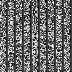

In [10]:
from PIL import Image
# %matplotlib inline


b = np.array(a)
c = b[0, 0, 0, :, :]

img = Image.fromarray(c, 'L')
img

In [11]:
b = np.array(a)
c = b[0, 1, 0, :, :]

img = Image.fromarray(c, 'L').convert('RGB')
img.show()

In [81]:
b_marginal = b[:, 0, :, :, 0]
b_norm = np.uint8(255 * (b_marginal - b_marginal.min()) / (b_marginal.max() - b_marginal.min()))

In [85]:
b_norm

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 1,  1,  1, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1]],

       [[ 8,  9, 10, ...,  6,  5,  4],
        [ 9, 10, 11, ...,  8,  6,  5],
        [10, 11, 12, ..., 10,  8,  6],
        ...,
        [ 6,  8, 10, ..., 12, 11, 10],
        [ 5,  6,  8, ..., 11, 10,  9],
        [ 4,  5,  6, ..., 10,  9,  8]],

       ...,

       [[25, 27, 28, ..., 21, 19, 18],
        [27, 28, 30, ..., 22, 21, 19],
        [28, 30, 31, ..., 23, 22, 21],
        ...,
        [21, 22, 23, ..., 31, 30, 28],
        [19, 21, 22, ..., 30, 28, 27],
        [18, 19, 21, ..., 28, 27

In [86]:
all_array = []

for i in range(407):
    all_array.append(np.array(Image.fromarray(b[i, 0, 0], 'L').convert('RGB')))
#     all_array.append(np.array(Image.fromarray(b_norm[i], 'L').convert('RGB')))

In [87]:
out = cv2.VideoWriter(
    '/Users/nikhilvs/repos/nyu/numerical-relativity-interpolation/notebooks/test.avi', 
    cv2.VideoWriter_fourcc(*'DIVX'), 
    10, 
    (72, 72)
)

for i in range(len(all_array)):
    out.write(all_array[i])
out.release()

In [76]:
all_array[0].shape

(72, 72, 3)

In [59]:
out.get(2209889)

0.0